# Introduction

In this Jupyter Notebook finds treating, cleaning and analysis of the dataset, also included PCA with its respectively plots.

# Import Libraries

In [22]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# Utilities and functions
import DataTransformations

# Data Treating and Cleaning

In [3]:
# Reading Dataset
ObesityDataset_Raw = pd.read_csv('./ObesityDataset_Raw.csv')

In [4]:
# Getting numerical and categorical labels
NumericalLabels , CategoricalLabels = DataTransformations.NumericalCategoricalLabels(ObesityDataset_Raw)

In [5]:
# Converting categorical values into numerical values
CategoricalLabel_NumericalValues = [
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Female', 'Male'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','Sometimes', 'Frequently', 'Always'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','yes'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['no','Sometimes', 'Frequently', 'Always'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Walking', 'Bike', 'Public_Transportation', 'Motorbike', 'Automobile'])},
    {CategoricalValue : NumericalValue for NumericalValue , CategoricalValue in enumerate(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])}
]

for CategoricalLabel , NumericalValues in zip(CategoricalLabels,CategoricalLabel_NumericalValues):
    DataTransformations.CategoricalIntoNumerical(ObesityDataset_Raw,CategoricalLabel,NumericalValues)

# Principal Component Analysis

In [9]:
FeaturesLabels = NumericalLabels + CategoricalLabels[:-1]
PCAModel_ObesityDataset = PCA(n_components=len(FeaturesLabels))
ObesityDataset_Eigenvalues = PCAModel_ObesityDataset.fit_transform(ObesityDataset_Raw[FeaturesLabels])

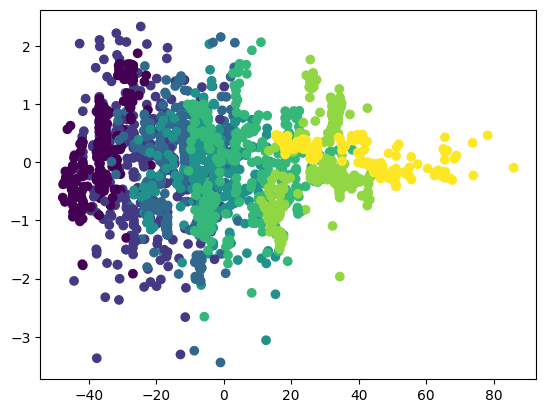

In [70]:
fig , ax = plt.subplots()
ax.scatter(ObesityDataset_Eigenvalues[:,0],ObesityDataset_Eigenvalues[:,3],c=ObesityDataset_Raw['NObeyesdad'])